In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns  # Import seaborn for ggplot-style visuals


In [53]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/pshenic4/Advanced-Data-Driven-Decision-Making/becf907b2c87751501daf026ad531a7767f38081/Case_Stud_%20I.csv"
df = pd.read_csv(url)
df

,number_of_solar_panels,manufacturing_cost
0,100,1250.0
1,200,1108.7
2,300,1053.5
3,400,1033.4
4,500,989.8
5,600,999.0
6,700,914.9
7,800,931.0
8,900,922.3
9,1000,861.9


# Experience Curve Analysis

## Does the *multiplicative learning model* apply to this data set?
Yes, because solar panel manufacturing follows learning curve cost reductions.

The multiplicative learning model assumes the following relationship:

\[
Y = A X^b
\]

In our case:
- **Y** represents *the average manufacturing cost of the last batch of 100 solar panels* at Heliotronic (in dollars) after having produced a cumulative production of **X** solar panels.
- **X** represents the column labeled **total number of solar panels produced** at Heliotronics.
- **b** is *the experience parameter*, which should **not** be confused with the learning rate.
- **A** is the price or **cost of the first unit**.

## Why Transform the Data?
To convert the non-linear equation into a linear form that can be analyzed using regression.
Obviously, \( Y = AX^b \) is **not a linear relationship** of the form:

\[
y = a + b_1 x_1
\]

that regression analysis can model.  



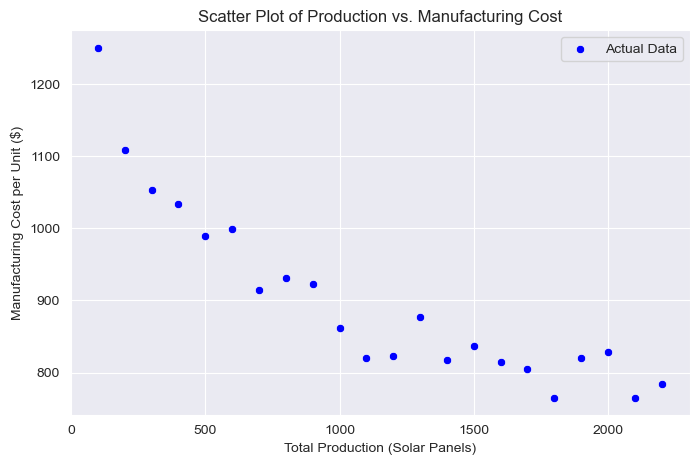

In [74]:
# Use seaborn's ggplot style
sns.set_style("darkgrid")

# Step 1: Plot raw data
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['number_of_solar_panels'], y=df['manufacturing_cost'], color='blue', label='Actual Data')
plt.xlabel('Total Production (Solar Panels)')
plt.ylabel('Manufacturing Cost per Unit ($)')
plt.title('Scatter Plot of Production vs. Manufacturing Cost')
plt.legend()
plt.show()

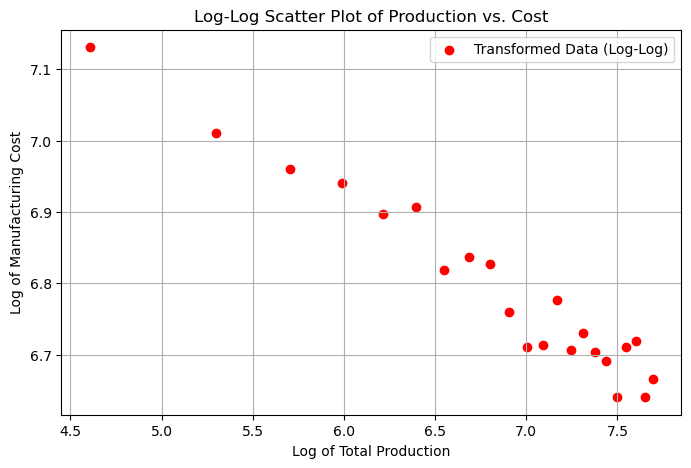

In [70]:
# Step 2: Log-transform the data
df['log_production'] = np.log(df['number_of_solar_panels'])
df['log_cost'] = np.log(df['manufacturing_cost'])

# Plot transformed data
plt.figure(figsize=(8,5))
plt.scatter(df['log_production'], df['log_cost'], color='red', label='Transformed Data (Log-Log)')
plt.xlabel('Log of Total Production')
plt.ylabel('Log of Manufacturing Cost')
plt.title('Log-Log Scatter Plot of Production vs. Cost')
plt.grid()
plt.legend()
plt.show()

In [59]:
# Step 3: Linear regression using transformed data
X = sm.add_constant(df['log_production'])  # Adding a constant for the intercept
y = df['log_cost']

# Fit regression model
model = sm.OLS(y, X).fit()

In [61]:
# Step 4: Display regression results
print(model.summary())

# Extract experience parameter (b) and learning rate
b = model.params['log_production']
learning_rate = 1 - 2 ** b

print(f"\nExperience Parameter (b): {b:.4f}")
print(f"Learning Rate: {learning_rate:.2%} cost reduction per doubling of production")

                            OLS Regression Results                            
Dep. Variable:               log_cost   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     381.4
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.70e-14
Time:                        17:57:05   Log-Likelihood:                 47.049
No. Observations:                  22   AIC:                            -90.10
Df Residuals:                      20   BIC:                            -87.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.8503      0.054    144.

In [63]:
# Step 5: Predict future costs for 4700, 4800, 4900, 5000 panels
future_production = np.array([4700, 4800, 4900, 5000])
log_future_production = np.log(future_production)

# Predict log-costs
predicted_log_costs = model.predict(sm.add_constant(log_future_production))

# Convert back to actual costs
predicted_costs = np.exp(predicted_log_costs)

# Display predictions
print("\nPredicted Costs for Future Production:")
for prod, cost in zip(future_production, predicted_costs):
    print(f"For {prod} units: ${cost:.2f} per unit")


Predicted Costs for Future Production:
For 4700 units: $692.17 per unit
For 4800 units: $689.91 per unit
For 4900 units: $687.71 per unit
For 5000 units: $685.56 per unit


In [65]:
# Step 6: Compute 95% Confidence Interval for cost predictions
confidence_interval = model.conf_int(alpha=0.05)

# Extract lower and upper bounds for experience parameter
b_lower, b_upper = confidence_interval.loc['log_production']

# Predict using lower and upper bounds of experience parameter
predicted_log_costs_lower = model.params['const'] + b_lower * log_future_production
predicted_log_costs_upper = model.params['const'] + b_upper * log_future_production

# Convert back to actual costs
predicted_costs_lower = np.exp(predicted_log_costs_lower)
predicted_costs_upper = np.exp(predicted_log_costs_upper)

# Display confidence intervals
print("\n95% Confidence Interval for Costs:")
for prod, cost_low, cost_high in zip(future_production, predicted_costs_lower, predicted_costs_upper):
    print(f"For {prod} units: ${cost_low:.2f} - ${cost_high:.2f} per unit")



95% Confidence Interval for Costs:
For 4700 units: $601.76 - $796.17 per unit
For 4800 units: $599.59 - $793.85 per unit
For 4900 units: $597.47 - $791.59 per unit
For 5000 units: $595.40 - $789.38 per unit
